In [24]:
# MTP EDA
## import packages
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

https://www.kaggle.com/erikvdven/tiktok-some-python-magic-in-a-notebook#Some-first-Analysis-📈

In [10]:

## load in the dataset
# read .json file
data = json.load(open('trending.json', encoding="utf8"))

# extract data via key from json
data = data['collector']

# convert to dataframe
df = pd.DataFrame(data)
df.head()

,id,text,createTime,authorMeta,musicMeta,covers,webVideoUrl,videoUrl,videoUrlNoWaterMark,videoMeta,diggCount,shareCount,playCount,commentCount,downloaded,mentions,hashtags
0,6907228749016714497,Confidence went 📈,1608214517,"{'id': '6825540583826768902', 'secUid': 'MS4wL...","{'musicId': '6790057285814061057', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@ninakleij/video/690722...,https://v77.tiktokcdn.com/ed1f811617d7b5e18b8d...,,"{'height': 1024, 'width': 576, 'duration': 15}",3710,50,44800,68,True,[],[]
1,6875468410612993286,Quiet Zone... follow me on insta: joeysofo. Co...,1600819763,"{'id': '6729292817489986566', 'secUid': 'MS4wL...","{'musicId': '6678927595137977094', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@joeysofo/video/6875468...,https://v77.tiktokcdn.com/ab935f1975cb8b69aebf...,,"{'height': 1024, 'width': 576, 'duration': 11}",55700,1817,838100,936,True,[@dwight_schnuute],[]
2,6898699405898059010,Iphone bend test🤗 #tiktok #viral #fyp #iphone ...,1606228625,"{'id': '6791901371429913601', 'secUid': 'MS4wL...","{'musicId': '6881287666340481026', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@jackeyephone/video/689...,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,"{'height': 960, 'width': 540, 'duration': 19}",936200,21100,15300000,27100,True,[],"[{'id': '23428', 'name': 'tiktok', 'title': ''..."
3,6902819837345533186,,1607187987,"{'id': '6574079584262094854', 'secUid': 'MS4wL...","{'musicId': '6881107586830076678', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@naomivaneeren/video/69...,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,"{'height': 1024, 'width': 576, 'duration': 13}",12900,197,94900,143,True,[],[]
4,6905635666588192002,小技です👟✨#tiktok教室#tutorial,1607843600,"{'id': '6586854399372394498', 'secUid': 'MS4wL...","{'musicId': '6649693417590754053', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@io.dreamer_mk/video/69...,https://v77.tiktokcdn.com/7622979a5ceb97c6da4e...,,"{'height': 1024, 'width': 576, 'duration': 22}",8805,198,115300,52,True,[],"[{'id': '1627704798586882', 'name': 'tiktok教室'..."


In [16]:
df_tiktok_dataset = df.explode('hashtags').explode('mentions')

In [17]:
def object_to_columns(dfRow, **kwargs):
    '''Function to expand cells containing dictionaries, to columns'''
    for column, prefix in kwargs.items():
        if isinstance(dfRow[column], dict):
            for key, value in dfRow[column].items():
                columnName = '{}.{}'.format(prefix, key)
                dfRow[columnName] = value
    return dfRow


# Expand certain cells containing dictionaries to columns
df_tiktok_dataset = df_tiktok_dataset.apply(object_to_columns,
                                            authorMeta='authorMeta',
                                            musicMeta='musicMeta',
                                            covers='cover',
                                            videoMeta='videoMeta',
                                            hashtags='hashtag', axis=1)

# Remove the original columns containing the dictionaries
df_tiktok_dataset = df_tiktok_dataset.drop(
    ['authorMeta', 'musicMeta', 'covers', 'videoMeta', 'hashtags'], axis=1)
df_tiktok_dataset


,authorMeta.avatar,authorMeta.id,authorMeta.name,authorMeta.nickName,authorMeta.secUid,authorMeta.signature,authorMeta.verified,commentCount,cover.default,cover.dynamic,...,musicMeta.playUrl,playCount,shareCount,text,videoMeta.duration,videoMeta.height,videoMeta.width,videoUrl,videoUrlNoWaterMark,webVideoUrl
0,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6825540583826768902,ninakleij,Nina,MS4wLjABAAAA1FfFjRMUzr0hX2YPT7pRr7bCPQWa-kU_kV...,don’t tell my instagram I’m here\n19 👸🏼,False,68,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,https://sf16-sg.tiktokcdn.com/obj/tos-alisg-v-...,44800,50,Confidence went 📈,15,1024,576,https://v77.tiktokcdn.com/ed1f811617d7b5e18b8d...,,https://www.tiktok.com/@ninakleij/video/690722...
1,https://p16-sign-va.tiktokcdn.com/musically-ma...,6729292817489986566,joeysofo,JoeySofo,MS4wLjABAAAAvkCSTiPWJm7Ctqp7AN3mauS_Bi8tVrbtBg...,Tinder couldn’t help me lose my virginity so I...,False,936,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,...,https://sf77-sg.tiktokcdn.com/obj/musically-ma...,838100,1817,Quiet Zone... follow me on insta: joeysofo. Co...,11,1024,576,https://v77.tiktokcdn.com/ab935f1975cb8b69aebf...,,https://www.tiktok.com/@joeysofo/video/6875468...
2,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6791901371429913601,jackeyephone,JackJacko,MS4wLjABAAAAsI8XQOceYtnIhIbLZLhvz24tOWdWYavlPe...,Zakelijk 📩 jackeyephone@gmail.com\nInstagram: ...,False,27100,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,https://sf16-sg.tiktokcdn.com/obj/tos-alisg-v-...,15300000,21100,Iphone bend test🤗 #tiktok #viral #fyp #iphone ...,19,960,540,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,https://www.tiktok.com/@jackeyephone/video/689...
2,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6791901371429913601,jackeyephone,JackJacko,MS4wLjABAAAAsI8XQOceYtnIhIbLZLhvz24tOWdWYavlPe...,Zakelijk 📩 jackeyephone@gmail.com\nInstagram: ...,False,27100,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,https://sf16-sg.tiktokcdn.com/obj/tos-alisg-v-...,15300000,21100,Iphone bend test🤗 #tiktok #viral #fyp #iphone ...,19,960,540,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,https://www.tiktok.com/@jackeyephone/video/689...
2,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6791901371429913601,jackeyephone,JackJacko,MS4wLjABAAAAsI8XQOceYtnIhIbLZLhvz24tOWdWYavlPe...,Zakelijk 📩 jackeyephone@gmail.com\nInstagram: ...,False,27100,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,https://sf16-sg.tiktokcdn.com/obj/tos-alisg-v-...,15300000,21100,Iphone bend test🤗 #tiktok #viral #fyp #iphone ...,19,960,540,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,https://www.tiktok.com/@jackeyephone/video/689...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,https://p77-sign-sg.tiktokcdn.com/musically-ma...,6798143079889470469,erinwilliams_1,Erin Williams,MS4wLjABAAAAdEeo7qMCWpjEHQIY8SBaOT4g79XSLKQz0l...,International Dressage Rider for GB 🇬🇧 \nIG: @...,False,874,https://p16-sign-sg.tiktokcdn.com/tos-alisg-p-...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,https://sf77-sg.tiktokcdn.com/obj/tiktok-obj/7...,309000,235,"The collab you didn’t know you needed, myself ...",14,1022,576,https://v77.tiktokcdn.com/a6a5e4b4310213520be7...,,https://www.tiktok.com/@erinwilliams_1/video/6...
999,https://p77-sign-sg.tiktokcdn.com/musically-ma...,6798143079889470469,erinwilliams_1,Erin Williams,MS4wLjABAAAAdEeo7qMCWpjEHQIY8SBaOT4g79XSLKQz0l...,International Dressage Rider for GB 🇬🇧 \nIG: @...,False,874,https://p16-sign-sg.tiktokcdn.com/tos-alisg-p-...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,https://sf77-sg.tiktokcdn.com/obj/tiktok-obj/7...,309000,235,"The collab you didn’t know you needed, myself ...",14,102

In [18]:
df_tiktok_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5693 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   authorMeta.avatar        5693 non-null   object
 1   authorMeta.id            5693 non-null   object
 2   authorMeta.name          5693 non-null   object
 3   authorMeta.nickName      5693 non-null   object
 4   authorMeta.secUid        5693 non-null   object
 5   authorMeta.signature     5693 non-null   object
 6   authorMeta.verified      5693 non-null   bool  
 7   commentCount             5693 non-null   int64 
 8   cover.default            5693 non-null   object
 9   cover.dynamic            5693 non-null   object
 10  cover.origin             5693 non-null   object
 11  createTime               5693 non-null   int64 
 12  diggCount                5693 non-null   int64 
 13  downloaded               5693 non-null   bool  
 14  hashtag.cover            5540 non-null   

In [19]:
# Get unique rows from dataset
df_unique_videos = df_tiktok_dataset.drop_duplicates(subset='id', keep="first")
df_unique_music = df_tiktok_dataset.drop_duplicates(
    subset='musicMeta.musicId', keep="first")
df_unique_authors = df_tiktok_dataset.drop_duplicates(
    subset='authorMeta.id', keep="first")

# Show amount of rows per dataset
{
    'df_tiktok_dataset': df_tiktok_dataset.shape,
    'df_unique_videos': df_unique_videos.shape,
    'df_unique_music': df_unique_music.shape,
    'df_unique_authors': df_unique_authors.shape
}

{'df_tiktok_dataset': (5693, 37),
 'df_unique_videos': (1000, 37),
 'df_unique_music': (907, 37),
 'df_unique_authors': (802, 37)}

In [20]:
# Set bucket ranges
buckets = list(range(0,105000,5000))

# Count videos with likes and comments per bucket range
likes = df_unique_videos.groupby( my_cut( df_unique_videos['diggCount'], buckets, upper_infinite=True ) ).diggCount.count()
comments = df_unique_videos.groupby( my_cut( df_unique_videos['commentCount'], buckets, upper_infinite=True ) ).diggCount.count()

# Transform from series to dataframe with some small modifications
likes = likes.rename('likes').to_frame().reset_index() 
comments = comments.rename('comments').to_frame().reset_index() 

# create subplots, two rows and 1 column each row
fig = make_subplots(2,1,subplot_titles=("Distribution of Likes", "Distribution of Comments"))

# First plot
fig.add_trace(
    go.Bar(y = likes['diggCount'], 
           x = likes['likes'], 
           name="Likes",
           text = likes['likes'], 
           orientation='h',
           texttemplate='%{text:.2s}', 
           textposition='outside', 
           marker_color='rgb(162, 210, 255)'
    ),
    row=1,col=1
)

# Second plot
fig.add_trace(
    go.Bar(y = comments['commentCount'], 
           x = comments['comments'], 
           name="Comments",
           text = comments['comments'], 
           orientation='h',
           texttemplate='%{text:.2s}', 
           textposition='outside', 
           marker_color='rgb(205, 180, 219)'
    ),
    row=2,col=1
)

fig.update_layout(uniformtext_minsize=8, 
                  uniformtext_mode='hide', 
                  title_text="Multiple Subplots with Titles",
                  height=1200,
                  template='plotly_white',
                  margin=go.layout.Margin(
                      l=130,r=5,b=5,t=100,pad=10
                  ))

fig.update_xaxes(title_text='Videos')
fig.update_yaxes(title_text='Likes', col=1, row=1, automargin=False)
fig.update_yaxes(title_text='Comments', col=1, row=2, automargin=False)

fig.show(config={'displayModeBar': False})

NameError: name 'my_cut' is not defined

TypeError: scatter() got multiple values for argument 'x'

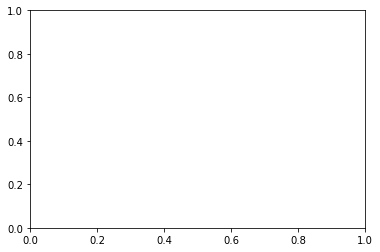

In [28]:
# Focus on dataset from 0 till 50.000 likes
df_videos_users_focus = df_unique_videos[df_unique_videos['diggCount'] <= 50000]

fig = plt.figure(figsize=(6, 4))

# Create a plot
px = fig.add_subplot()

# Create a scatter plot with a trendline
fig = px.scatter(df_videos_users_focus, trendline="ols",
                 x="diggCount",
                 y="commentCount",
                 labels={
                     "diggCount": "Likes",
                     "commentCount": "Comments"
                 },
                 log_y=True,
                 trendline_color_override="#ff7096",
                 template='plotly_white')

fig.update_traces(marker=dict(
    color='#4cc9f0',
    opacity=0.6,
))
fig.show()


In [ ]:
## converting createTime from XX to DD/MM/YYYY
